In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
uvals = np.linspace(-10.0,10.0,1000)

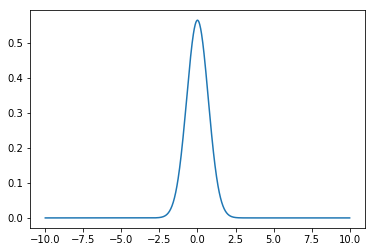

In [50]:
plt.plot(uvals,z_phi())

In [28]:
def z_phi():
    return np.sqrt(1/np.pi) * np.exp(-uvals**2.0)

def z_phi_r(ub):
    x = uvals - ub
    return np.sqrt(1/np.pi) * np.exp(-x**2.0)

def z_phi_b(ub):
    x = uvals + ub
    return np.sqrt(1/np.pi) * np.exp(-x**2.0)


In [29]:
def z_nI(n0,a,inc,azi,ub):
    p0 = z_phi()
    pr = z_phi_r(ub)
    pb = z_phi_b(ub)
    
    return (1.0 + (n0/2.0)*(p0*(np.sin(inc))**2.0 + 0.5*(pb + pr)*(1.0 + (np.cos(inc))**2.0 )))

def z_nQ(n0,a,inc,azi,ub):
    
    p0 = z_phi()
    pr = z_phi_r(ub)
    pb = z_phi_b(ub)

    
    return (n0/2.0)*( p0 - 0.5*(pb + pr) )*(np.sin(inc))**2.0 * np.cos(2.0*azi)

def z_nU(n0,a,inc,azi,ub):
    
    p0 = z_phi()
    pr = z_phi_r(ub)
    pb = z_phi_b(ub)
    
    
    return (n0/2.0)*( p0 - 0.5*(pb + pr) )*(np.sin(inc))**2.0 * np.sin(2.0*azi)

def z_nV(n0,a,inc,azi,ub):
    p0 = z_phi()
    pr = z_phi_r(ub)
    pb = z_phi_b(ub)
    

    
    return (n0/2.0)*(pr - pb) * np.cos(inc)

In [42]:
def raw_emerge_I(n0,a,inc,azi,ub,s1,s0):
        
    nI_v = z_nI(n0,a,inc,azi,ub)
    nQ_v = z_nQ(n0,a,inc,azi,ub)
    nU_v = z_nU(n0,a,inc,azi,ub)
    nV_v = z_nV(n0,a,inc,azi,ub)
    
    det = nI_v**2.0 * (nI_v**2.0 - nQ_v**2.0 - nU_v**2.0 - nV_v**2.0)
    
    I0 = s0 + det**(-1.0) * nI_v * (nI_v**2.0) * s1
    Q0 = -1.0*det**(-1.0)*(nI_v**2.0 * nQ_v ) * s1
    U0 = -1.0*det**(-1.0) * (nI_v**2.0 * nU_v ) * s1
    V0 = -1.0*det**(-1.0) * (nI_v**2.0 * nV_v ) * s1
    
    I_cont = I0[0]
    
    stokes = np.array([uvals,I0/I_cont,Q0/I_cont,U0/I_cont,V0/I_cont])
    
    return stokes

    

In [43]:
n0 = 10.0
dw = 1.0
a = 0.05
ub = 2.4
inc = np.pi/4.0
azi = np.pi/6.0
s1 = 4.0
s0 = 1.0

ray = raw_emerge_I(n0,a,inc,azi,ub,s1,s0)

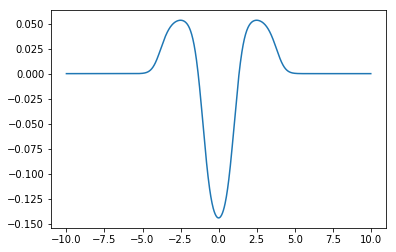

In [51]:
plt.plot(ray[0,:],ray[2,:])

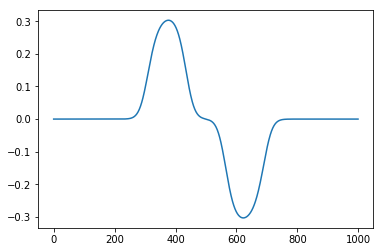

In [56]:
plt.plot(ray[4,:])

In [58]:
data = fits.open('SP3D20150110.fits')

NameError: name 'fits' is not defined